In [46]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [47]:
gold_dataset = pd.read_csv('E:\Data Science Projects\Gold Price Prediction\gld_price_data.csv')

In [5]:
gold_dataset.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


Let's try to get the shape of the data

In [6]:
gold_dataset.shape

(2290, 6)

Checking for Null Values

In [7]:
gold_dataset.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

There is no missing values in the dataset so we are good to go

## Getting the Statistical Data

In [8]:
gold_dataset.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


## Finding the Co-relationship 
### Correlation
- Positive Correlation
- Negative Correlation

In [9]:
correlation = gold_dataset.corr()

C:\Users\karti\AppData\Local\Temp\ipykernel_10356\4191627151.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = gold_dataset.corr()


<Axes: >

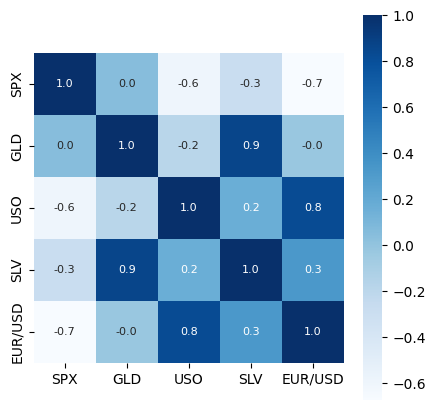

In [12]:
# Now getting the correlation
fig = plt.figure(figsize=(5,5))

sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

Let's see the correlation in the dataset


In [13]:
print(correlation['EUR/USD'])

SPX       -0.672017
GLD       -0.024375
USO        0.829317
SLV        0.321631
EUR/USD    1.000000
Name: EUR/USD, dtype: float64


C:\Users\karti\AppData\Local\Temp\ipykernel_10356\803201893.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gold_dataset['GLD'], color='blue')


<Axes: xlabel='GLD', ylabel='Density'>

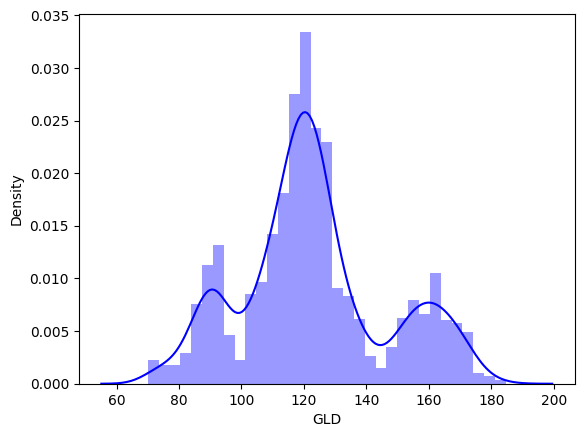

In [16]:
sns.distplot(gold_dataset['GLD'], color='blue')

## Splitting the Feature and Target

In [20]:
X = gold_dataset.drop(['Date','GLD'],axis=1)
Y = gold_dataset['EUR/USD']

In [21]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [22]:
print(Y)

0       1.471692
1       1.474491
2       1.475492
3       1.468299
4       1.557099
          ...   
2285    1.186789
2286    1.184722
2287    1.191753
2288    1.193118
2289    1.182033
Name: EUR/USD, Length: 2290, dtype: float64


## Splitting the Training and Testing Data

In [23]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2, random_state=2)

In [24]:
print(X.shape,X_train.shape,X_test.shape)

(2290, 4) (1832, 4) (458, 4)


In [37]:
regressor = RandomForestRegressor(n_estimators=100)

In [38]:
regressor.fit(X_train,Y_train)

RandomForestRegressor()

Model Evaluation

In [39]:
#Prediction on Test Data
test_data_prediction = regressor.predict(X_test)

In [40]:
print(test_data_prediction)

[1.3249057  1.4725871  1.12022062 1.12704401 1.0671592  1.22709803
 1.43341149 1.19607953 1.27438717 1.34663757 1.24307918 1.41717177
 1.30091566 1.30775727 1.07661847 1.09088827 1.35103224 1.31098879
 1.31101227 1.37620327 1.28584213 1.32647587 1.43230841 1.43731402
 1.20410509 1.4210421  1.43299376 1.37394755 1.28182638 1.2771829
 1.31812305 1.22703224 1.53329939 1.11234069 1.23356166 1.32245313
 1.09358173 1.14803003 1.29786066 1.09632596 1.37506636 1.54513508
 1.23225126 1.29149896 1.28182544 1.35680973 1.15378578 1.12165645
 1.58727229 1.36105834 1.25056942 1.12161396 1.101582   1.12916118
 1.16491375 1.29778568 1.34046585 1.43476496 1.45451394 1.56207536
 1.5025244  1.55684754 1.34672572 1.17986136 1.22875937 1.3674515
 1.3467108  1.18165579 1.27381549 1.46730455 1.34430466 1.44385041
 1.39212584 1.26665283 1.31854665 1.35490708 1.09014469 1.13659723
 1.08703378 1.1138171  1.07268985 1.43251484 1.36848371 1.05831258
 1.56751868 1.55164289 1.48297391 1.36806603 1.07503347 1.473188

R squared Error

In [48]:
#R squared Error
error_score = metrics.r2_score(Y_test, test_data_prediction)

In [49]:
print("The Error Score is: ",error_score)

The Error Score is:  0.9999808848796924


Comparing the Actual Value and Predictive Value in a Plot

In [50]:
Y_test = list(Y_test)

In [51]:
print(Y_test)

[1.324854, 1.472581, 1.119996, 1.127142, 1.067247, 1.226843, 1.433158, 1.195943, 1.274307, 1.346801, 1.243317, 1.417073, 1.300728, 1.307702, 1.076994, 1.090893, 1.351004, 1.311011, 1.311131, 1.376008, 1.285843, 1.326489, 1.432439, 1.437298, 1.203746, 1.421202, 1.432932, 1.373928, 1.282166, 1.276944, 1.318044, 1.226813, 1.53339, 1.112397, 1.233745, 1.322401, 1.093482, 1.147552, 1.297993, 1.096395, 1.375327, 1.545022, 1.23224, 1.291306, 1.282051, 1.356779, 1.155095, 1.121604, 1.590204, 1.361007, 1.250531, 1.121466, 1.101564, 1.128694, 1.163887, 1.297892, 1.340357, 1.435297, 1.455498, 1.562207, 1.49961, 1.555791, 1.346692, 1.180429, 1.228713, 1.367596, 1.346711, 1.181488, 1.273837, 1.467093, 1.344393, 1.443793, 1.392002, 1.2664, 1.318496, 1.354903, 1.090001, 1.136402, 1.086803, 1.113908, 1.072869, 1.432706, 1.368495, 1.058425, 1.567791, 1.552193, 1.482975, 1.368195, 1.075199, 1.472949, 1.354316, 1.3996, 1.324328, 1.114914, 1.161494, 1.134945, 1.228049, 1.595813, 1.374438, 1.319087, 1.3782

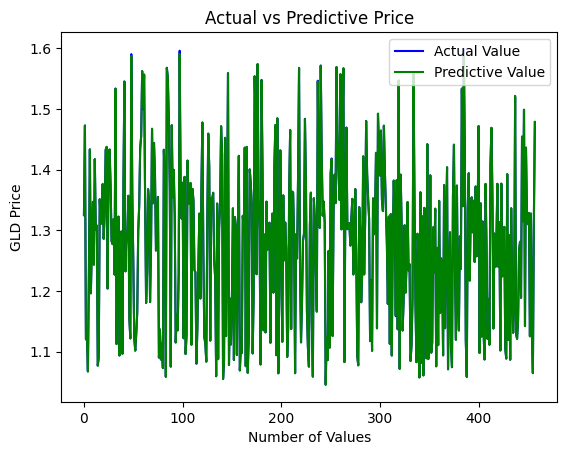

In [52]:
plt.plot(Y_test, color="blue", label= "Actual Value")
plt.plot(test_data_prediction, color='green', label='Predictive Value')
plt.title('Actual vs Predictive Price')
plt.xlabel('Number of Values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()

## As we can see we see both the predicted and the actual values are same so we have successfully predicted the values of Gold for the given dataset